<a href="https://colab.research.google.com/github/Evianitary18/Programming-With-Python/blob/main/Evianita_Rifka_Yulistia_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STUDY CASE

My Future Platform is an edutech startup that provides additional learning access services through the LMS feature where users can register for online learning classes to support work skills and portfolios.

With the large number of users the platform has, of course the company has quite a large amount of data. However, the management of the data held has not been maximized properly as a basis for decision making.

Therefore, stakeholders need a medium such as a dashboard that displays up-to-date information to see metrics that are relevant to business needs such as number of users, number of classes, class completion rate, etc.

Not only dashboards, stakeholders also have business questions that they hope can be answered with the current data availability. It is hoped that the answers provided will help stakeholders in making data-based decisions in the future.

Therefore, stakeholders need a medium such as a dashboard that displays up-to-date information to see metrics that are relevant to business needs such as number of users, number of classes, class completion rate, etc.

Not only dashboards, stakeholders also have business questions that they hope can be answered with the current availability of data. It is hoped that the answers provided will help stakeholders in making data-based decisions in the future.

***

**1. What fields of study are most in demand when >= April 2020 and after the pandemic ends >= January 1 2023**

**2. What are the monthly trends in class enrollment for each field of study during and after the pandemic?**

**3. What percentage of users have more than 1 class of interest?**

**4. If stakeholders want to provide class vouchers, to loyal users of the platform, provide a list of users who have the potential to have a high voucher redemption rate, seen from the number of classes attended and the last time the user accessed the class (updated _at)?**

# DATASET

Link Dataset:
https://docs.google.com/spreadsheets/d/1k7A1ZQ92slepO1LzPRt1Yti7mV2nuER6/edit?usp=sharing&ouid=106206484783993710530&rtpof=true&sd=true


# DATA DESCRIPTION

**Data Structure**  
- **Data Count**: 16  
- **Data Types**: Integer, Text, Date, Timestamp, Numeric, Varchar  
- **Main Focus**: User information, class information, learning activities, and evaluation metrics.  

**Data Identification**  
- **id_registration**: Primary key of the dataset  
- **id_user and user_name**: Unique user identifiers (masked).  
- **birth_date & gender**: User demographic data.  
- **id_class & class_name**: Unique identifiers and names of classes taken by users.  
- **field_of_study**: Category or type of study field undertaken by users.  
- **registration_date**: Timestamp of user registration for a class.  
- **completion_date**: Timestamp indicating class completion.  
- **last_access_date**: User's last activity in the class.  

**Learning Activities and Evaluation**  
- **activities_completed & total_activities**: User performance in completing learning activities in the class.  
- **final_score**: Final score obtained from the class.  
- **class_rating & class_review**: User evaluation of class quality.  

**Data Quality and Complexity**  

**Data Completeness**  
- Timestamp information allows trend exploration based on time dimensions.  

**Availability of Numerical Data**  
- Columns like `final_score`, `activities_completed`, and `class_rating` enable quantitative evaluation of user performance.  

**Textual Data**  

**Correlation with Most Preferred Study Fields**  
- Data in the `field_of_study` column can be combined with `registration_date` to observe class registration trends based on time and category.  

**Monthly Class Registration Trends**  
- The `registration_date` column can be processed for seasonal trend analysis.  

**User Loyalty**  
- Data on `id_user` and `id_class` allows the identification of users taking multiple classes.  

**Potential for Voucher Distribution**  
- Combining data from `id_user`, `last_access_date`, and `activities_completed` can facilitate user segmentation for loyalty programs.  

**Recommended Analyses**  
1. **Frequency Analysis**: On categorical columns like `field_of_study`.  
2. **Time Trends**: Time-based analysis for `registration_date` and `last_access_date`.  
3. **User Total Analysis**: Based on the total number of classes taken.  
4. **Cluster Analysis**: User segmentation based on the total classes taken and last access time.  

# DATA PREPARATION

1. Library import is performed before data manipulation and analysis to manage data in the form of a data frame.  
2. Data is read from an XLSX file and the top rows of the output are displayed.

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# code to remove the warning message when running the code below
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Data
df_project = pd.read_excel('Project4_1A.xlsx')
df_project.head()

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,1,80c253a2888fc16e3d7109622d3f9747,Mah****,2001-01-06,Perempuan,5d546faa0bf551fd84b9117c03f63311,Pan**************************,Pemasaran,2020-04-22,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,70.0,3.0,lumayan
1,2,a96f131b42a5c14f62d0d02dd322c9c6,Put**************,1995-09-10,Laki-laki,ba042968f0362aae24d2a001d1323af7,Kel*********************************************,Pendidikan & Pelatihan,2020-04-22,2023-09-18 16:15:18,2020-04-22 18:38:45,18,18,50.0,4.0,Sangat membantu dan mudah di pahami
2,3,d4a81886022faa38ee6a1456a4eb1e0b,JAK********,1993-05-11,Male,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa Inggris,2020-04-22,2023-09-18 16:15:18,2020-04-23 03:37:14,28,28,93.0,5.0,Menarik
3,4,00dfe9a7199b926b061f833264887595,Vir******************,1990-01-30,Perempuan,4bc224deb0b8d2639c9e759ff6063023,Men*******************************************,Digital & Teknologi,2020-04-23,2023-09-18 16:15:18,2020-04-25 16:40:37,10,17,100.0,3.0,lumayan
4,5,d3c27944d155d39dc085fe5eeb81c30b,Nof***********,1990-11-01,Laki-laki,77809dae4c51c080e1156ebbacba0c33,Mud*******************************,Soft Skills,2020-04-23,2023-09-18 16:15:18,2020-04-24 00:31:27,52,55,100.0,5.0,Sangat baik.


# DATA EXPLORATION

1. Data exploration is carried out at an early stage with the aim of understanding the data in depth and comprehensively before further analysis is carried out.
2. In this exploration process, information on the data can also be displayed, such as the number of rows and columns of data, as well as the type of data itself.

In [ ]:
#Check how many rows and columns
df_project.shape

(5430, 16)

In [ ]:
# See The Data
df_project

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,1,80c253a2888fc16e3d7109622d3f9747,Mah****,2001-01-06,Perempuan,5d546faa0bf551fd84b9117c03f63311,Pan**************************,Pemasaran,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,70.0,3.0,lumayan
1,2,a96f131b42a5c14f62d0d02dd322c9c6,Put**************,1995-09-10,Laki-laki,ba042968f0362aae24d2a001d1323af7,Kel*********************************************,Pendidikan & Pelatihan,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-22 18:38:45,18,18,50.0,4.0,Sangat membantu dan mudah di pahami
2,3,d4a81886022faa38ee6a1456a4eb1e0b,JAK********,1993-05-11,Male,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa Inggris,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-23 03:37:14,28,28,93.0,5.0,Menarik
3,4,00dfe9a7199b926b061f833264887595,Vir******************,1990-01-30,Perempuan,4bc224deb0b8d2639c9e759ff6063023,Men*******************************************,Digital & Teknologi,2020-04-23 00:00:00,2023-09-18 16:15:18,2020-04-25 16:40:37,10,17,100.0,3.0,lumayan
4,5,d3c27944d155d39dc085fe5eeb81c30b,Nof***********,1990-11-01,Laki-laki,77809dae4c51c080e1156ebbacba0c33,Mud*******************************,Soft Skills,2020-04-23 00:00:00,2023-09-18 16:15:18,2020-04-24 00:31:27,52,55,100.0,5.0,Sangat baik.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,5426,938bf00b10f984aeb504a54977f2613b,Fat*******************,2000-01-04,Laki-laki,fb41f1657e2c2edf6b9c86753022f6c9,Tea***********************,Pendidikan & Pelatihan,2023-10-18 12:13:22,2023-10-18 12:14:45,NaT,1,26,NaN,NaN,NaN
5426,5427,ff620890bf8b6331a1270b441b9a2623,LIS**,1993-08-04,Perempuan,6d89a47b116dc3fd794d001d4df394a2,Men*******************************************...,Teknologi (IT),2023-10-18 14:36:59,2023-10-23 06:12:16,NaT,7,21,0.0,NaN,NaN
5427,5428,606b2531d04332f012c451046d0172d3,San*****,1974-04-04,Female,d0a261660d3b3f7b818eb1b377fe1aae,Men**********************************,Perencanaan Bisnis,2023-10-19 06:21:03,2023-10-23 13:18:41,NaT,3,25,NaN,NaN,NaN
5428,5429,a2edfd70e77158beeb086dfb4feb114d,REY******,1998-02-14,Male,1bbc33c05ea4bcc59386b13dfac009b0,Cus*******************************************...,Marketing,2023-10-19 09:39:38,2023-10-23 15:31:55,NaT,3,22,0.0,NaN,NaN


In [ ]:
# check information on data
df_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_pendaftaran          5430 non-null   int64         
 1   id_pengguna             5430 non-null   object        
 2   nama_pengguna           5430 non-null   object        
 3   tanggal_lahir           5364 non-null   datetime64[ns]
 4   jenis_kelamin           5430 non-null   object        
 5   id_kelas                5430 non-null   object        
 6   nama_kelas              5430 non-null   object        
 7   bidang_studi            5430 non-null   object        
 8   tanggal_mendaftar       5430 non-null   datetime64[ns]
 9   tanggal_terakhir_akses  5430 non-null   datetime64[ns]
 10  tanggal_menyelesaikan   4912 non-null   datetime64[ns]
 11  aktivitas_selesai       5430 non-null   int64         
 12  total_aktivitas         5430 non-null   int64   

# DATA CLEANING

# Missing Value

Check whether there are any missing values ​​in the data.

In [ ]:
missing_values = df_project.isnull().sum()
if missing_values.sum() == 0:
    print('No missing value\n', missing_values)
else:
    print('There are missing values\n', missing_values)

There are missing values
 id_pendaftaran              0
id_pengguna                 0
nama_pengguna               0
tanggal_lahir              66
jenis_kelamin               0
id_kelas                    0
nama_kelas                  0
bidang_studi                0
tanggal_mendaftar           0
tanggal_terakhir_akses      0
tanggal_menyelesaikan     518
aktivitas_selesai           0
total_aktivitas             0
skor_akhir                830
rating_kelas              521
review_kelas              521
dtype: int64


In [ ]:
# Check the percentage of missing values
missing_percentage = (df_project.isna().sum()/df_project.shape[0])*100
missing_percentage

,0
id_pendaftaran,0.000000
id_pengguna,0.000000
nama_pengguna,0.000000
tanggal_lahir,1.215470
jenis_kelamin,0.000000
id_kelas,0.000000
nama_kelas,0.000000
bidang_studi,0.000000
tanggal_mendaftar,0.000000
tanggal_terakhir_akses,0.000000




> **View the distribution of data that has missing values**



<Axes: xlabel='tanggal_lahir', ylabel='Count'>

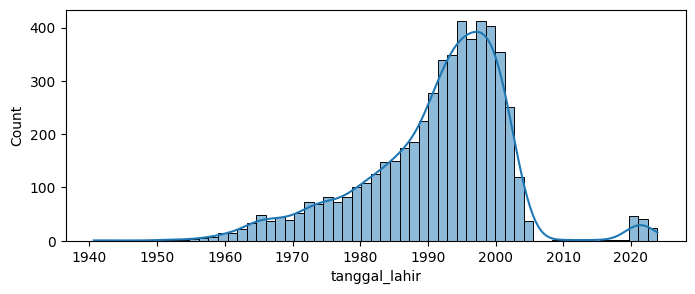

In [ ]:
# see the distribution of birth dates
plt.figure(figsize=(8, 3))
sns.histplot(df_project['tanggal_lahir'], kde=True)

<Axes: xlabel='tanggal_menyelesaikan', ylabel='Count'>

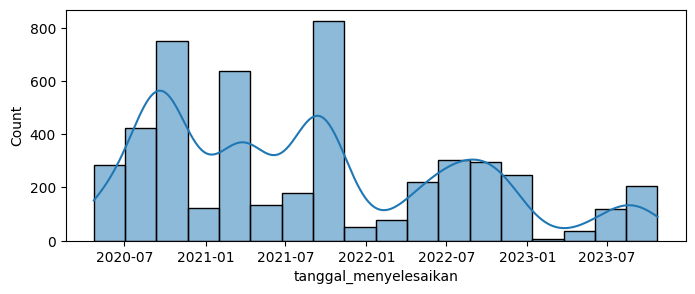

In [ ]:
# See the distribution of tanggal_menyelesaikan
plt.figure(figsize=(8, 3))
sns.histplot(df_project['tanggal_menyelesaikan'], kde = True)

<Axes: xlabel='skor_akhir', ylabel='Count'>

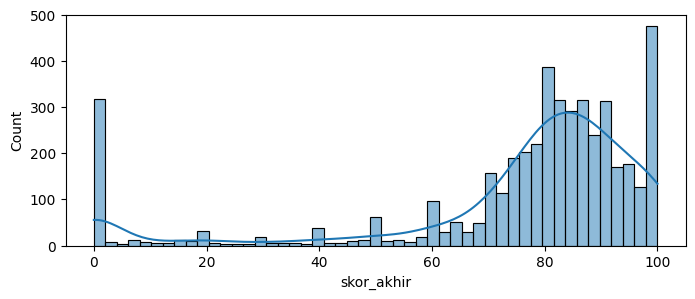

In [ ]:
# See the distribution of skor_akhir
plt.figure(figsize=(8, 3))
sns.histplot(df_project['skor_akhir'], kde = True)

<Axes: xlabel='rating_kelas', ylabel='Count'>

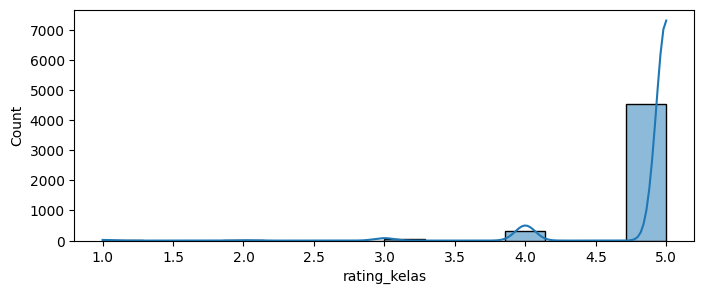

In [ ]:
# See the distribution of rating_kelas
plt.figure(figsize=(8, 3))
sns.histplot(df_project['rating_kelas'], kde = True)

<Axes: xlabel='review_kelas', ylabel='Count'>

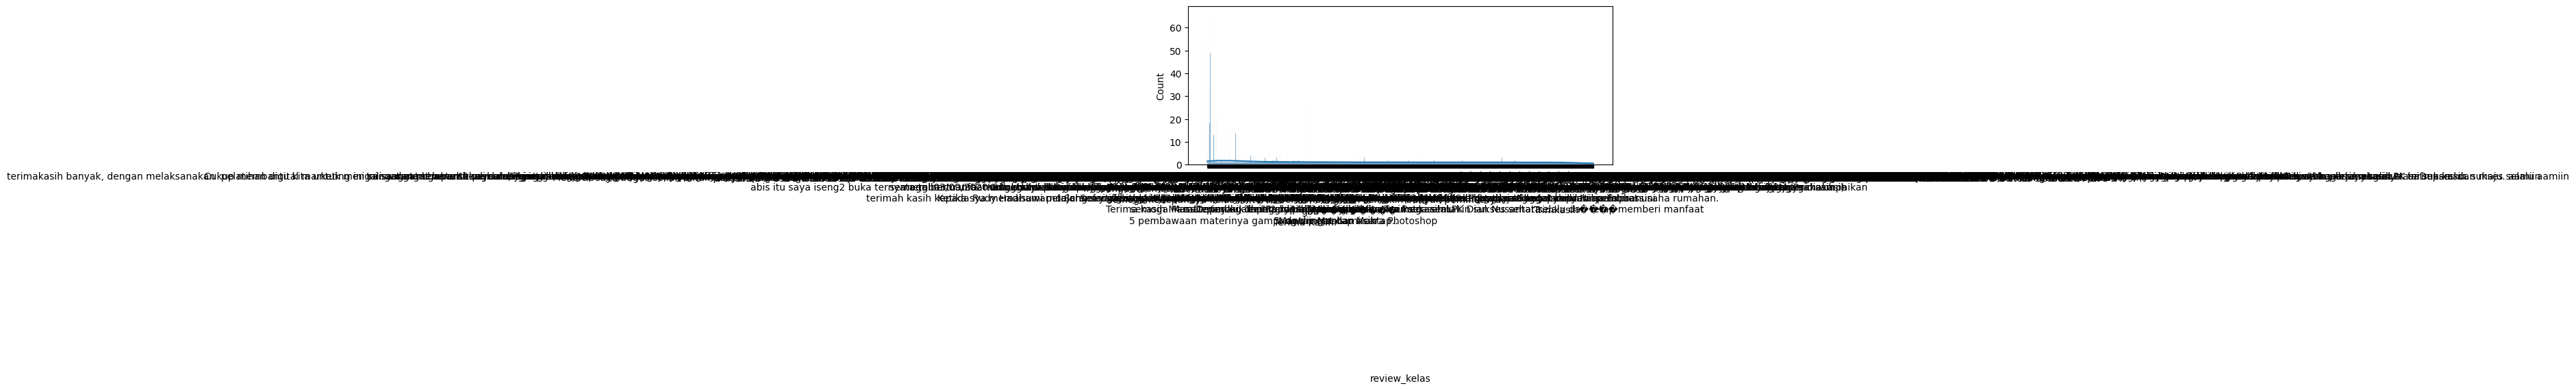

In [ ]:
# See the distribution of review_kelas
plt.figure(figsize=(8, 3))
sns.histplot(df_project['review_kelas'], kde = True)



> **Handling missing values**



- Remove missing date of birth
- Leave missing the completion date
- Missing imputation on final scores that contain >=1 completed activity
- Replace class review to string
- Fill in the missing values ​​in the class rating with a value of 0

The reasons for treatment are listed below.

**Tanggal Lahir**

Missing values ​​on date of birth are deleted because they will not affect data analysis. In addition, because the total number of missing data was less than 5%, data was deleted (dropped).

In [15]:
# delete missing date of birth
df_project = df_project.dropna(subset=['tanggal_lahir'])

**Tanggal Menyelesaikan**

Handling missing values ​​in the completed_date column is by leaving the data because carrying out imputation or deletion of the data is feared to cause bias due to the large number of missing values ​​in that column.

**Skor Akhir**

- Users who have not completed the class, logically no final score is obtained. Therefore, missing values ​​can be left alone because the user does not yet have a final score.

- Users who complete (completed activities >= 1), automatically have a final score. Therefore, the final score was imputed using the median because the data distribution was not normal.

In [16]:
# change the missing value of the final score to the median value if the activity completed is >=1
df_project['skor_akhir'] = df_project.loc[df_project['aktivitas_selesai'] >= 1, 'skor_akhir'].fillna(df_project['skor_akhir'].median())

**Review Kelas**

Missing values ​​in review_class can be replaced with the default string. It can be seen that the rows that have missing class_rating and class_review are the same. Therefore, if the class rating is NaN then the class review is also NaN. So missing values ​​in review_class can be replaced with "review has not been filled in" and existing values ​​can be replaced with "review has been filled in".

In [17]:
# check for class review lines that are null
df_project.loc[df_project['review_kelas'].isnull()]

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
160,161,8d45eb827805a2d52d6f4430714d75a5,A R********,1994-03-21,Laki-laki,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa,2020-05-13 00:00:00,2023-09-18 16:15:18,2020-05-18 17:46:02,28,28,100.0,NaN,NaN
178,179,6c148c163210c5684f8d3d233d408eec,Rem****************,1997-09-29,Perempuan,f1880e808ab9f07e5368ed00a2867e80,Kel*************************************,Pendidikan & Pelatihan,2020-05-15 00:00:00,2023-09-18 16:15:18,NaT,2,24,0.0,NaN,NaN
190,191,5745928a7da718c43bfcee831c67b37c,Jup********,1997-07-22,Male,f1880e808ab9f07e5368ed00a2867e80,Kel*************************************,Bisnis Layanan,2020-05-16 00:00:00,2023-09-18 16:15:18,NaT,6,24,4.0,NaN,NaN
205,206,c2ca91cf34f54182f1cc9b9babcf2dce,BAY******************,1996-01-07,Laki-laki,9f8b09ff9533b532a21d15ce4142df2e,MAS*****************************************,Pendidikan & Pelatihan,2020-05-19 00:00:00,2023-09-18 16:15:18,NaT,3,15,0.0,NaN,NaN
213,214,baad3bab9e548c2381f9079ad9905659,Adn********,1973-03-23,Male,5b722fa137cdaf9928b4eefe9d4d7adf,Mer**************************,Pendidikan & Pelatihan,2020-05-21 00:00:00,2023-09-18 16:15:18,NaT,18,23,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,5426,938bf00b10f984aeb504a54977f2613b,Fat*******************,2000-01-04,Laki-laki,fb41f1657e2c2edf6b9c86753022f6c9,Tea***********************,Pendidikan & Pelatihan,2023-10-18 12:13:22,2023-10-18 12:14:45,NaT,1,26,82.5,NaN,NaN
5426,5427,ff620890bf8b6331a1270b441b9a2623,LIS**,1993-08-04,Perempuan,6d89a47b116dc3fd794d001d4df394a2,Men*******************************************...,Teknologi (IT),2023-10-18 14:36:59,2023-10-23 06:12:16,NaT,7,21,0.0,NaN,NaN
5427,5428,606b2531d04332f012c451046d0172d3,San*****,1974-04-04,Female,d0a261660d3b3f7b818eb1b377fe1aae,Men**********************************,Perencanaan Bisnis,2023-10-19 06:21:03,2023-10-23 13:18:41,NaT,3,25,82.5,NaN,NaN
5428,5429,a2edfd70e77158beeb086dfb4feb114d,REY******,1998-02-14,Male,1bbc33c05ea4bcc59386b13dfac009b0,Cus*******************************************...,Marketing,2023-10-19 09:39:38,2023-10-23 15:31:55,NaT,3,22,0.0,NaN,NaN


In [18]:
# replace missing values ​​in class review with strings
df_project['review_kelas'] = df_project['review_kelas'].fillna("review has not been filled in")
df_project['review_kelas'] = df_project['review_kelas'].apply(lambda x: "review has been filled in" if x != "review has not been filled in" else x)

**Rating Kelas**

Fill in the missing values ​​in the class rating with a value of 0 which indicates that the class rating has not been filled in as in the class review which has not been filled in either. Review classes that have not been filled, then the class rating is 0 (not yet filled).

In [19]:
# check the rating kelas row which is null
df_project.loc[df_project['rating_kelas'].isnull()]

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
160,161,8d45eb827805a2d52d6f4430714d75a5,A R********,1994-03-21,Laki-laki,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa,2020-05-13 00:00:00,2023-09-18 16:15:18,2020-05-18 17:46:02,28,28,100.0,NaN,review has not been filled in
178,179,6c148c163210c5684f8d3d233d408eec,Rem****************,1997-09-29,Perempuan,f1880e808ab9f07e5368ed00a2867e80,Kel*************************************,Pendidikan & Pelatihan,2020-05-15 00:00:00,2023-09-18 16:15:18,NaT,2,24,0.0,NaN,review has not been filled in
190,191,5745928a7da718c43bfcee831c67b37c,Jup********,1997-07-22,Male,f1880e808ab9f07e5368ed00a2867e80,Kel*************************************,Bisnis Layanan,2020-05-16 00:00:00,2023-09-18 16:15:18,NaT,6,24,4.0,NaN,review has not been filled in
205,206,c2ca91cf34f54182f1cc9b9babcf2dce,BAY******************,1996-01-07,Laki-laki,9f8b09ff9533b532a21d15ce4142df2e,MAS*****************************************,Pendidikan & Pelatihan,2020-05-19 00:00:00,2023-09-18 16:15:18,NaT,3,15,0.0,NaN,review has not been filled in
213,214,baad3bab9e548c2381f9079ad9905659,Adn********,1973-03-23,Male,5b722fa137cdaf9928b4eefe9d4d7adf,Mer**************************,Pendidikan & Pelatihan,2020-05-21 00:00:00,2023-09-18 16:15:18,NaT,18,23,13.0,NaN,review has not been filled in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,5426,938bf00b10f984aeb504a54977f2613b,Fat*******************,2000-01-04,Laki-laki,fb41f1657e2c2edf6b9c86753022f6c9,Tea***********************,Pendidikan & Pelatihan,2023-10-18 12:13:22,2023-10-18 12:14:45,NaT,1,26,82.5,NaN,review has not been filled in
5426,5427,ff620890bf8b6331a1270b441b9a2623,LIS**,1993-08-04,Perempuan,6d89a47b116dc3fd794d001d4df394a2,Men*******************************************...,Teknologi (IT),2023-10-18 14:36:59,2023-10-23 06:12:16,NaT,7,21,0.0,NaN,review has not been filled in
5427,5428,606b2531d04332f012c451046d0172d3,San*****,1974-04-04,Female,d0a261660d3b3f7b818eb1b377fe1aae,Men**********************************,Perencanaan Bisnis,2023-10-19 06:21:03,2023-10-23 13:18:41,NaT,3,25,82.5,NaN,review has not been filled in
5428,5429,a2edfd70e77158beeb086dfb4feb114d,REY******,1998-02-14,Male,1bbc33c05ea4bcc59386b13dfac009b0,Cus*******************************************...,Marketing,2023-10-19 09:39:38,2023-10-23 15:31:55,NaT,3,22,0.0,NaN,review has not been filled in


In [20]:
# replace the missing value in the 'rating kelas' with a value of 0
df_project['rating_kelas'] = df_project['rating_kelas'].fillna(0)

In [21]:
# final check missing
df_project.isna().sum()

,0
id_pendaftaran,0
id_pengguna,0
nama_pengguna,0
tanggal_lahir,0
jenis_kelamin,0
id_kelas,0
nama_kelas,0
bidang_studi,0
tanggal_mendaftar,0
tanggal_terakhir_akses,0


In [22]:
# final percentase missing
missing_percentage = (df_project.isna().sum()/df_project.shape[0])*100
missing_percentage

,0
id_pendaftaran,0.000000
id_pengguna,0.000000
nama_pengguna,0.000000
tanggal_lahir,0.000000
jenis_kelamin,0.000000
id_kelas,0.000000
nama_kelas,0.000000
bidang_studi,0.000000
tanggal_mendaftar,0.000000
tanggal_terakhir_akses,0.000000


The missing value on the completion date is left because it is not used in this analysis and the final score still has a NaN value because the user has not completed the activity so they do not have a final score value.

# Duplicate

In [23]:
# check whether there are duplicate values ​​in the data
print('The number of duplicate values:', df_project.duplicated().sum())

The number of duplicate values: 0


# Typo

- Check each column
- Change user names, class names, and fields of study to lowercase to anticipate capital letter typos with the same meaning. Apart from that, replacing or combining the same values ​​as business management with business management in the field of study.
- Changing the Male data to male and female to female because previously there were similar meanings between male and male and female and female.


# id_pendaftaran

In [24]:
# check the id_pendaftaran column
df_project.id_pendaftaran.unique()

array([   1,    2,    3, ..., 5428, 5429, 5430])

# id_pengguna

In [25]:
# check the id_pengguna column
df_project.id_pengguna.unique()

array(['80c253a2888fc16e3d7109622d3f9747',
       'a96f131b42a5c14f62d0d02dd322c9c6',
       'd4a81886022faa38ee6a1456a4eb1e0b', ...,
       '606b2531d04332f012c451046d0172d3',
       'a2edfd70e77158beeb086dfb4feb114d',
       '0479b2191760127a9d3fee6d66e453ff'], dtype=object)

# nama_pengguna

Changed the username format to lowercase to ensure consistency and reduce the possibility of errors in data grouping.

In [26]:
# check the nama_pengguna column
df_project.nama_pengguna.value_counts()

,count
nama_pengguna,
Muh***********,15
MUH******************,13
Sit*********,12
MUH************,10
Muh************,9
...,...
ST **********,1
Nad*****,1
Vev*,1


In [27]:
# change to lowercase
df_project.nama_pengguna = df_project.nama_pengguna.str.lower()
df_project.nama_pengguna.value_counts()

,count
nama_pengguna,
muh***********,24
muh******************,23
sit*********,23
muh************,20
nur******,17
...,...
zan*************,1
wul******************,1
ann***************,1


# tanggal_lahir

In [28]:
# check the tanggal_lahir column
df_project.tanggal_lahir.value_counts()

,count
tanggal_lahir,
1993-01-01,7
1999-10-10,6
1992-10-05,5
1995-09-03,5
1999-05-10,5
...,...
1975-12-02,1
1980-09-30,1
1994-01-22,1


# jenis_kelamin

Changing gender data into Indonesian, such as from "Male/Female" to "Male/Female" to ensure consistency and reduce the possibility of errors in data grouping.

In [29]:
# check the jenis_kelamin column
df_project.jenis_kelamin.unique()

array(['Perempuan', 'Laki-laki', 'Male', 'Female'], dtype=object)

In [30]:
# ubah Male ke Laki-laki dan female ke perempuan
df_project.jenis_kelamin = df_project.jenis_kelamin.replace(['Male', 'Female'], ['Laki-laki', 'Perempuan'])
df_project.jenis_kelamin.unique()

array(['Perempuan', 'Laki-laki'], dtype=object)

# id_kelas

In [31]:
# check the id_kelas column
df_project.id_kelas.value_counts()

,count
id_kelas,
89ecd896ec4b7ee6bbdab2f06faddaa8,386
262cf9b725395d261f41ca335b0418c5,379
f92280d5caee89a6e423487224181eb3,168
6acf2a7bed7aa1b5dee0c8c2e2561fee,122
85deac299e10014ac54f9a4e32f230ef,98
...,...
7829de94dfe0e78f61131fe3522350e5,1
75a90c6add3f35e2c977785a96a4f402,1
8e74aca9038eb33419d12f2e893be59c,1


# nama_kelas

Changed the class_name column format to lowercase to ensure consistency and reduce the possibility of errors in data grouping

In [32]:
# check the nama_kelas column
df_project.nama_kelas.value_counts()

,count
nama_kelas,
Men***************************************************,402
Men***********************************,391
Pen************************************************,172
Men****************************************************,157
Dig**************,122
...,...
Mem********************************,1
Mer*************************************************************,1
Mer***********************************,1


In [33]:
# change the nama_kelas to lowercase
df_project.nama_kelas = df_project.nama_kelas.str.lower()
df_project.nama_kelas.value_counts()

,count
nama_kelas,
men***************************************************,402
men***********************************,391
pen************************************************,172
men****************************************************,157
dig**************,122
...,...
pel**********************************,1
bel*****************************************************************,1
ana************************************************,1


# bidang_studi

Changed the bidang_studi column format to lowercase to ensure consistency and reduce the possibility of errors in data grouping
Grouping data that has the same meaning

In [34]:
# check the bidang_studi column
df_project.bidang_studi.value_counts()

,count
bidang_studi,
Pendidikan & Pelatihan,426
Bisnis Manajemen,395
Digital & Teknologi,280
Bisnis Layanan,252
Teknologi (IT),170
...,...
IPS,1
Pembuatan media belajar,1
Bahasa dan Sastra Jerman,1


In [35]:
# check the Change bidang_studi column to lowercase
df_project.bidang_studi = df_project.bidang_studi.str.lower()
df_project.bidang_studi.value_counts()

,count
bidang_studi,
pendidikan & pelatihan,426
bisnis manajemen,395
digital & teknologi,280
bisnis layanan,252
teknologi (it),170
...,...
personal project,1
pembuatan media belajar,1
ips,1


In [36]:
# see the data of bidang studi
df_project.bidang_studi.sort_values().unique()

array(['administrasi', 'administrasi infrastruktur jaringan',
       'administrasi pajak', 'administrasi perhotelan',
       'administrasi sistem jaringan', 'administrasi transaksi',
       'administrasi umum', 'agama budha', 'agama islam',
       'agama kristen protestan', 'agribisnis pengolahan pertanian',
       'akidah akhlaq', 'aktivis sosial', 'akuntansi', 'akuntansi dasar',
       'akuntansi perbankan dan keuangan mikro', "al qur'an dan hadits",
       'animasi', 'animasi 2d dan 3d',
       'aplikasi pengolah angka / spreadsheet', 'aplikasi perkantoran',
       'asesmen & reporting', 'bahasa', 'bahasa asing pilihan',
       'bahasa dan sastra inggris', 'bahasa dan sastra jerman',
       'bahasa dan sastra mandarin', 'bahasa indonesia', 'bahasa inggris',
       'bahasa korea', 'bahasa lainnya', 'barista', 'bartender',
       'belajar efektif keluarga kita', 'bimbingan konseling', 'biologi',
       'bisnis & manajemen', 'bisnis e-commerce', 'bisnis layanan',
       'bisnis manajem

There are several data that have the same meaning and combine them :

administrasi umum -> administrasi

teknik & sains -> teknik dan sains

design -> desain

marketing -> pemasaran

perecanaan bisnis -> perencanaan bisnis

al qur'an dan hadits, fikih, agama budha, agama islam, agama kristen protestan, akidah akhlaq -> pendidikan agama

baking, cooking -> tataboga

it certification, digital & teknologi -> teknologi (it)

business management, bisnis & manajemen -> bisnis manajemen

bahasa lainnya, bahasa pilihan asing -> bahasa

In [37]:
# combine several names of fields of study because they actually have the same value
df_project.bidang_studi = df_project.bidang_studi.replace(['administrasi umum', 'teknik & sains', 'design', 'marketing', 'perecanaan bisnis'],
 ['administrasi', 'teknik dan sains', 'desain', 'pemasaran', 'perencanaan bisnis'], regex=True)

In [38]:
# combining several fields of study into religious education
df_project.bidang_studi = df_project.bidang_studi.replace(["al qur'an dan hadits", "fikih", "agama budha", "agama islam", "agama kristen protestan", "akidah akhlaq"], "pendidikan agama", regex=True)

# combining several fields of study into culinary arts
df_project.bidang_studi = df_project.bidang_studi.replace(["baking", "cooking"], "tata boga", regex=True)

# combining several fields of study into technology (it)
df_project.bidang_studi = df_project.bidang_studi.replace(["it certification", "digital & teknologi"], "teknologi (it)", regex=True)

# combining several fields of study into business management
df_project.bidang_studi = df_project.bidang_studi.replace(["business management", "bisnis & manajemen"], "bisnis manajemen", regex=True)

# combines several fields of study into a language
df_project.bidang_studi = df_project.bidang_studi.replace(["bahasa lainnya", "bahasa pilihan asing"], "bahasa", regex=True)

In [39]:
# check again bidang studi
df_project.bidang_studi.value_counts()

,count
bidang_studi,
teknologi (it),453
bisnis manajemen,443
pendidikan & pelatihan,426
bisnis layanan,252
bahasa inggris,169
...,...
"pendidikan jasmani, olahraga, dan kesehatan (pjok)",1
administrasi sistem jaringan,1
social studies,1


# tanggal_mendaftar

In [40]:
# check the tanggal_mendaftar column
df_project.tanggal_mendaftar.value_counts()

,count
tanggal_mendaftar,
2020-09-10 00:00:00,101
2020-09-11 00:00:00,60
2021-03-03 00:00:00,53
2021-03-17 00:00:00,46
2020-09-25 00:00:00,46
...,...
2021-09-15 17:57:46,1
2021-09-15 19:15:12,1
2021-09-15 19:31:51,1


# tanggal_terakhir_akses

In [41]:
# check the tanggal_terakhir_akses column
df_project.tanggal_terakhir_akses.value_counts()

,count
tanggal_terakhir_akses,
2023-09-18 16:15:18,1035
2022-03-16 23:04:33,18
2022-05-25 06:25:37,13
2022-06-24 02:39:24,4
2021-12-09 14:30:07,4
...,...
2021-04-17 09:20:58,1
2021-04-13 13:38:46,1
2021-04-13 04:44:32,1


# tanggal_menyelesaikan

In [42]:
# check the tanggal_menyelesaikan column
df_project.tanggal_menyelesaikan.value_counts()

,count
tanggal_menyelesaikan,
2021-03-28 19:43:28,3
2023-08-30 05:04:05,3
2023-09-15 09:11:18,2
2021-04-01 23:48:11,2
2022-05-14 12:36:20,2
...,...
2021-03-04 03:53:29,1
2021-03-03 15:52:31,1
2021-03-05 00:27:25,1


# aktivitas_selesai

In [43]:
# check the aktivitas_selesai column
df_project.aktivitas_selesai.value_counts()

,count
aktivitas_selesai,
20,463
7,408
23,398
10,194
0,177
...,...
103,1
84,1
130,1


# skor_akhir

In [44]:
# check the skor_akhir column
df_project.skor_akhir.value_counts()

,count
skor_akhir,
82.50,725
100.00,405
0.00,264
80.00,204
90.00,165
...,...
6.36,1
52.40,1
45.50,1


# review_kelas

In [45]:
# check the review_kelas column
df_project.review_kelas.value_counts()

,count
review_kelas,
review has been filled in,4854
review has not been filled in,510


# rating_kelas

In [ ]:
# check the rating_kelas column
df_project.rating_kelas.value_counts()

# OUTLIER

Check for outliers using the IQR method in the skor_akhir, aktivitas_selesai and total_aktivitas columns
Create outlier check and outlier filter functions

In [46]:
# Create an outlier check function
def cek_outlier(data, nama_kolom, batas):

    Q1 = np.percentile(data[nama_kolom], 25)
    Q3 = np.percentile(data[nama_kolom], 75)
    IQR = Q3 - Q1

    if batas == 'upper_bound':
        bound = np.where(data[nama_kolom] > (Q3 + 1.5 * IQR))
    elif batas == 'lower_bound':
        bound = np.where(data[nama_kolom] < (Q1 - 1.5 * IQR))
    else:
        raise ValueError("Parameter 'batas' harus 'upper_bound' atau 'lower_bound'.")

    return list(bound[0])

In [47]:
#function to filter outliers
def filter_outlier(df_project, nama_kolom):

    # Mengambil indeks outlier upper dan lower bound
    upper_bound = cek_outlier(df_project, nama_kolom, 'upper_bound')
    lower_bound = cek_outlier(df_project, nama_kolom, 'lower_bound')

    # Menghapus baris yang merupakan outlier
    df_filtered = df_project.loc[~df_project.index.isin(upper_bound + lower_bound)]

    return df_filtered

# Skor Akhir

In [48]:
# check for outliers in the final score

# Executing the function to get the index that is an outlier in the 'final_score' column
upper_skor_akhir= cek_outlier(df_project, 'skor_akhir', 'upper_bound')
print("Indeks outlier upper bound untuk kolom 'skor_akhir':", upper_skor_akhir)

lower_skor_akhir= cek_outlier(df_project, 'skor_akhir', 'lower_bound')
print("Indeks outlier lower bound untuk kolom 'skor_akhir':", lower_skor_akhir)

# Displays the total number of outliers in the 'price' column
print(f"Jumlah total outlier pada kolom 'skor_akhir' sebanyak: {len(upper_skor_akhir) + len(lower_skor_akhir)}")

Indeks outlier upper bound untuk kolom 'skor_akhir': []
Indeks outlier lower bound untuk kolom 'skor_akhir': []
Jumlah total outlier pada kolom 'skor_akhir' sebanyak: 0


The results obtained show that there are no outliers in the 'final_score' column. So there is no treatment whatsoever to process outliers.

# Aktivitas Selesai

- Detect total outliers and treat outliers
- Perform visualization in the completed activity column to see the distribution after the outlier filter

In [49]:
# Run a function to get an index of outliers in the 'aktivitas_selesai' column
upper_aktivitas_selesai = cek_outlier(df_project, 'aktivitas_selesai', 'upper_bound')
print("Indeks outlier upper bound untuk kolom 'aktivitas_selesai':", upper_aktivitas_selesai)

lower_aktivitas_selesai = cek_outlier(df_project, 'aktivitas_selesai', 'lower_bound')
print("Indeks outlier lower bound untuk kolom 'aktivitas_selesai':", lower_aktivitas_selesai)

# Displays the total number of outliers in the 'aktivitas_selesai' column
print(f"Jumlah total outlier pada kolom 'aktivitas_selesai' sebanyak: {len(upper_aktivitas_selesai) + len(lower_aktivitas_selesai)}")

Indeks outlier upper bound untuk kolom 'aktivitas_selesai': [2594, 2595, 2610, 2611, 2617, 2635, 2639, 2645, 2649, 2674, 2715, 2733, 2755, 2771, 2777, 2787, 2792, 2798, 2800, 2813, 2816, 2831, 2852, 2858, 2881, 2889, 2898, 2913, 2918, 2922, 2956, 3067, 3090, 3104, 3111, 3120, 3147, 3159, 3169, 3203, 3205, 3232, 3243, 3260, 3358, 3361, 3369, 3412, 3476, 3483, 3488, 3623, 3636, 3669, 3833, 3896, 3941, 3993, 4152, 4170, 4293, 4385, 4419, 4563, 4681, 4699, 4852, 4935]
Indeks outlier lower bound untuk kolom 'aktivitas_selesai': []
Jumlah total outlier pada kolom 'aktivitas_selesai' sebanyak: 68


- There are 68 outliers in completed_activity data
- View data rows that contain outliers in the total activities completed
- Outliers in the activity column have been treated using the winsorizing method

In [50]:
# View data rows that contain outliers in completed activities
df_project.iloc[upper_aktivitas_selesai].sort_values(by='aktivitas_selesai', ascending=False)

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
4990,4991,ae831bfd18ab0ff1268bb96c6c4985fb,ire**********,2002-01-20,Perempuan,49beacc377ad2e2d779a31830dbaeedd,mag*******************************************...,sumber daya manusia,2023-03-13 05:57:14,2023-06-26 05:59:11,NaT,161,162,100.0,0.0,review has not been filled in
4032,4033,e37e20564393d34459bb8e0a101462bd,mar****************,1997-03-10,Perempuan,9c97aa48df1b78c1ee2a46f9638b68c2,men*******************************************...,belajar efektif keluarga kita,2022-06-04 13:19:00,2022-06-09 06:36:29,2022-06-09 06:36:28,130,130,79.5,5.0,review has been filled in
3095,3096,9fc974d193541c2d3aae7819cc9d4834,ran*********************,1986-04-22,Perempuan,cb77200792126148eb4d31a78bea6889,men*******************************************...,komunikasi bisnis,2021-09-15 10:55:24,2021-09-16 16:05:36,2021-09-16 16:05:35,123,123,84.8,5.0,review has been filled in
3390,3391,3c73d613ca4c98fae096ff3606a9b402,muh***********,1997-09-18,Laki-laki,cb77200792126148eb4d31a78bea6889,men*******************************************...,bisnis online,2021-09-23 03:36:42,2021-09-23 14:48:05,2021-09-23 14:48:03,123,123,87.2,5.0,review has been filled in
3236,3237,24db3d8a067f3d3e9351732ede163a4b,kri********,1998-05-25,Perempuan,cb77200792126148eb4d31a78bea6889,men*******************************************...,komunikasi bisnis,2021-09-16 17:17:14,2021-11-24 04:12:38,2021-11-10 03:46:52,123,123,77.6,5.0,review has been filled in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,3275,3b57cc005897514d4d944cc93314f2bc,des******************,1991-07-21,Perempuan,fe5013d7ce4c33aab3b08ea63ed81796,men*******************************************...,pemasaran,2021-09-17 14:56:49,2021-09-27 16:08:26,2021-09-27 16:08:25,107,107,98.4,5.0,review has been filled in
2782,2783,0fa1abf769b368eaf7847ee3ccf50b09,pil***********,1996-12-05,Perempuan,fe5013d7ce4c33aab3b08ea63ed81796,men*******************************************...,teknologi (it),2021-08-31 12:42:01,2021-09-10 05:11:51,2021-09-10 02:35:00,107,107,83.6,5.0,review has been filled in
4751,4752,aeecc70fc47d2f6f1ccf747c341633bf,nad*,1990-08-20,Laki-laki,a5fe811334d7cf60f01a23fff3c061b8,mer*******************************************...,desain & seni,2022-10-31 15:17:45,2022-11-02 07:49:40,2022-11-02 07:49:37,104,104,56.9,5.0,review has been filled in
4906,4907,1bad32c5975ccd1a1e36995033f6ebfd,nyi*******************,2022-11-20,Perempuan,a5fe811334d7cf60f01a23fff3c061b8,mer*******************************************...,animasi,2022-11-11 08:52:05,2022-11-11 16:21:15,2022-11-11 16:00:06,104,104,100.0,5.0,review has been filled in


In [51]:
# calling the activity's filter_outlier 'aktivitas_selesai'
df_p1 = filter_outlier(df_project, 'aktivitas_selesai')
print(df_p1.shape)

(5298, 16)


Using the Winsorizing method to adjust for outliers by replacing extreme values ​​outside the upper limit with the limit value, data that is outside a certain percentile range will be included within the specified limit, thereby reducing the influence of outliers without deleting the data.

In [52]:
from scipy.stats.mstats import winsorize

# Function to calculate outliers based on upper bound
def count_upper_outliers(df, column_name):
    Q1, Q3 = df[column_name].quantile(0.25), df[column_name].quantile(0.75)
    upper_bound = Q3 + 1.5 * (Q3 - Q1)
    return len(df[df[column_name] > upper_bound])

# Winsorize the 'aktivitas_selesai' column at the 5th and 95th percentiles
df_p1['aktivitas_selesai'] = winsorize(df_p1['aktivitas_selesai'], limits=[0.05, 0.05])

# Checking for outliers after Winsorization
num_outliers = count_upper_outliers(df_p1, 'aktivitas_selesai')
print(f"Number of outliers in column 'aktivitas_selesai': {num_outliers}")

Number of outliers in column 'aktivitas_selesai': 0


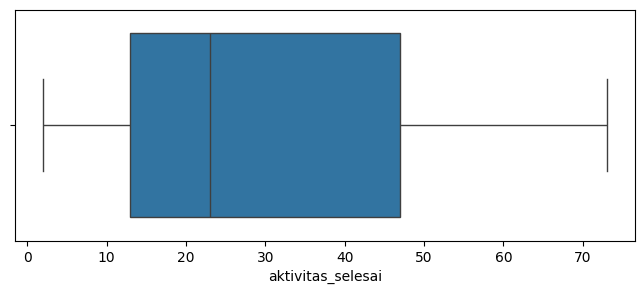

In [53]:
# displays visualization with a boxplot after filtering outliers
plt.figure(figsize=(8, 3))
sns.boxplot(x= 'aktivitas_selesai', data=df_p1)
plt.show()

<Axes: xlabel='aktivitas_selesai', ylabel='Count'>

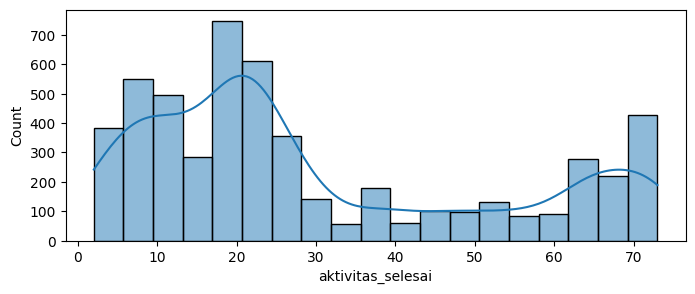

In [54]:
# display visualization after filter outlier aktivitas selesai
plt.figure(figsize=(8, 3))
sns.histplot(df_p1['aktivitas_selesai'], kde=True)

After using the winsorizing method, no outliers were detected in the data, shown in the histogram above

# Total aktivitas

Detect total outliers and treat outliers if outliers are found in this column

In [55]:
# Executes the function to get the index that is an outlier in the column 'total_aktivitas'
upper_total_aktivitas = cek_outlier(df_project, 'total_aktivitas', 'upper_bound')
print("Indeks outlier upper bound untuk kolom 'total_aktivitas':", upper_total_aktivitas)

lower_total_aktivitas = cek_outlier(df_project, 'total_aktivitas', 'lower_bound')
print("Indeks outlier lower bound untuk kolom 'total_aktivitas':", lower_total_aktivitas)

# Displays the total number of outliers in a column 'total_aktivitas'
print(f"Jumlah total outlier pada kolom 'total_aktivitas' sebanyak: {len(upper_total_aktivitas) + len(lower_total_aktivitas)}")

Indeks outlier upper bound untuk kolom 'total_aktivitas': [4935]
Indeks outlier lower bound untuk kolom 'total_aktivitas': []
Jumlah total outlier pada kolom 'total_aktivitas' sebanyak: 1


- There is 1 outlier in the Total_Activity column
- Outliers in Total_Activity are treated using the winsorizing method

In [56]:
# look at the data rows that contain outliers in the total_aktivitas
df_project.iloc[upper_total_aktivitas].sort_values(by='total_aktivitas', ascending=False)

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
4990,4991,ae831bfd18ab0ff1268bb96c6c4985fb,ire**********,2002-01-20,Perempuan,49beacc377ad2e2d779a31830dbaeedd,mag*******************************************...,sumber daya manusia,2023-03-13 05:57:14,2023-06-26 05:59:11,NaT,161,162,100.0,0.0,review has not been filled in


In [57]:
# call the activity total filter_outlier function
df_p2 = filter_outlier(df_p1, 'total_aktivitas')
print(df_p2.shape)

(5297, 16)


Using the Winsorizing method to adjust for outliers by replacing extreme values ​​outside the upper limit with these limit values, data that is outside a certain percentile range will be included within the specified limits, thereby reducing the influence of outliers without deleting the data.

In [59]:
# Function to calculate outliers based on upper bound
def count_upper_outliers(df, column_name):
    Q1, Q3 = df[column_name].quantile(0.25), df[column_name].quantile(0.75)
    upper_bound = Q3 + 1.5 * (Q3 - Q1)
    return len(df[df[column_name] > upper_bound])

# Winsorize the 'total_aktivitas' column at the 5th and 95th percentiles
df_p2['total_aktivitas'] = winsorize(df_p2['total_aktivitas'], limits=[0.05, 0.05])

# Checking for outliers after Winsorization
num_outliers = count_upper_outliers(df_p2, 'total_aktivitas')
print(f"Number of outliers in column 'total_aktivitas': {num_outliers}")

Number of outliers in column 'total_aktivitas': 0


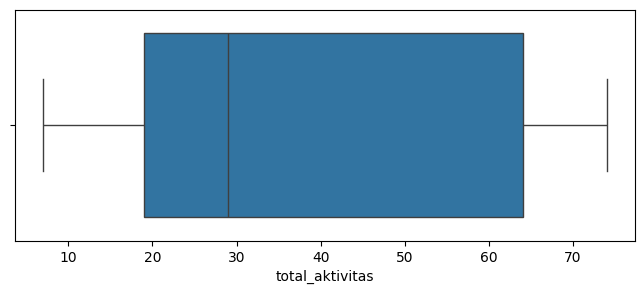

In [60]:
# displays visualization with boxplot after filtering
plt.figure(figsize=(8, 3))
sns.boxplot(x= 'total_aktivitas', data=df_p2)
plt.show()

In [61]:
# check how much data there is after the outlier filter
df_p2.shape

(5297, 16)

In [62]:
# rename df_p3 to df_project
df_project = df_p2
df_project.shape

(5297, 16)

In [63]:
# displays data after the cleaning process
df_project.reset_index().head()

,index,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,0,1,80c253a2888fc16e3d7109622d3f9747,mah****,2001-01-06,Perempuan,5d546faa0bf551fd84b9117c03f63311,pan**************************,pemasaran,2020-04-22,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,70.0,3.0,review has been filled in
1,1,2,a96f131b42a5c14f62d0d02dd322c9c6,put**************,1995-09-10,Laki-laki,ba042968f0362aae24d2a001d1323af7,kel*********************************************,pendidikan & pelatihan,2020-04-22,2023-09-18 16:15:18,2020-04-22 18:38:45,18,18,50.0,4.0,review has been filled in
2,2,3,d4a81886022faa38ee6a1456a4eb1e0b,jak********,1993-05-11,Laki-laki,98c097fad98132c31139dc8de9ce69cd,kel*******************************************,bahasa inggris,2020-04-22,2023-09-18 16:15:18,2020-04-23 03:37:14,28,28,93.0,5.0,review has been filled in
3,3,4,00dfe9a7199b926b061f833264887595,vir******************,1990-01-30,Perempuan,4bc224deb0b8d2639c9e759ff6063023,men*******************************************,teknologi (it),2020-04-23,2023-09-18 16:15:18,2020-04-25 16:40:37,10,17,100.0,3.0,review has been filled in
4,4,5,d3c27944d155d39dc085fe5eeb81c30b,nof***********,1990-11-01,Laki-laki,77809dae4c51c080e1156ebbacba0c33,mud*******************************,soft skills,2020-04-23,2023-09-18 16:15:18,2020-04-24 00:31:27,52,55,100.0,5.0,review has been filled in


# SAVING DATA CLEANING

In [64]:
# Save the clean, filtered data into an Excel file
df_project.to_excel('/content/Project4_1AFinal.xlsx', index=False)

# Download file
from google.colab import files
files.download('/content/Project4_1AFinal.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EDA

# Number 1

What fields of study are most in demand when >= April 2020 and after the pandemic ends >= January 1 2023

In [65]:
# Make sure the 'register_date' column is in datetime format
df_project['tanggal_mendaftar'] = pd.to_datetime(df_project['tanggal_mendaftar'])

In [66]:
# Filter data for the period >= April 2020
periode_awal = df_project[(df_project['tanggal_mendaftar'] >= '2020-04-01') & (df_project['tanggal_mendaftar'] < '2023-01-01')]
minat_awal = periode_awal['bidang_studi'].value_counts().idxmax()
jumlah_awal = periode_awal['bidang_studi'].value_counts().max()
print(f"Bidang studi paling diminati sejak April 2020: {minat_awal} dengan jumlah pendaftar {jumlah_awal}")

Bidang studi paling diminati sejak April 2020: teknologi (it) dengan jumlah pendaftar 430


In [67]:
# Filter data for the period >= January 1, 2023
periode_akhir = df_project[df_project['tanggal_mendaftar'] >= '2023-01-01']
minat_akhir = periode_akhir['bidang_studi'].value_counts().idxmax()
jumlah_akhir = periode_akhir['bidang_studi'].value_counts().max()
print(f"Bidang studi paling diminati sejak 1 Januari 2023: {minat_akhir} dengan jumlah pendaftar {jumlah_akhir}")

Bidang studi paling diminati sejak 1 Januari 2023: administrasi dengan jumlah pendaftar 41


# Number 2

Monthly trends in class enrollment for each field of study during and after the pandemic

In [68]:
# df time for pandemic times
periode_awal = df_project[(df_project['tanggal_mendaftar'] >= '2020-04-01') & (df_project['tanggal_mendaftar'] < '2023-01-01')]

# df time for after the pandemic
periode_akhir = df_project[df_project['tanggal_mendaftar'] >= '2023-01-01']

Before pandemic

In [69]:
periode_awal.bidang_studi.value_counts()

,count
bidang_studi,
teknologi (it),430
bisnis manajemen,419
pendidikan & pelatihan,410
bisnis layanan,243
bahasa inggris,159
...,...
kepariwisataan,1
public speaking,1
social studies,1


In [70]:
# Monthly trends in class enrollment in each field of study during the pandemic
tren1 = periode_awal.groupby(pd.Grouper(key='tanggal_mendaftar', freq='m'))['bidang_studi'].value_counts()
tren1

tanggal_mendaftar  bidang_studi       
2020-04-30         bisnis layanan         10
                   teknologi (it)         10
                   bahasa inggris          7
                   bisnis manajemen        5
                   bimbingan konseling     4
                                          ..
2022-12-31         pengembangan diri       2
                   asesmen & reporting     1
                   bisnis manajemen        1
                   komputer grafis         1
                   storytelling            1
Name: count, Length: 1138, dtype: int64

In [71]:
# fields of study that have the highest interest every month during the pandemic
tren_tertinggi_1 = tren1.groupby(level=0).head(1).reset_index()
tren_tertinggi_1.columns = ['tanggal_mendaftar', 'bidang_studi', 'jumlah_pendaftaran']
tren_tertinggi_1.head()

,tanggal_mendaftar,bidang_studi,jumlah_pendaftaran
0,2020-04-30,bisnis layanan,10
1,2020-05-31,bisnis layanan,22
2,2020-06-30,pendidikan & pelatihan,17
3,2020-07-31,pendidikan & pelatihan,7
4,2020-08-31,bisnis manajemen,32


In [72]:
# make register_date be the year-month of highest_trend_1
tren_tertinggi_1['tanggal_mendaftar'] = pd.to_datetime(tren_tertinggi_1['tanggal_mendaftar']).dt.strftime('%y-%m')
tren_tertinggi_1.head()

,tanggal_mendaftar,bidang_studi,jumlah_pendaftaran
0,20-04,bisnis layanan,10
1,20-05,bisnis layanan,22
2,20-06,pendidikan & pelatihan,17
3,20-07,pendidikan & pelatihan,7
4,20-08,bisnis manajemen,32


Text(0.5, 1.0, 'Tren bulanan pendaftaran kelas untuk setiap bidang studi saat pandemi')

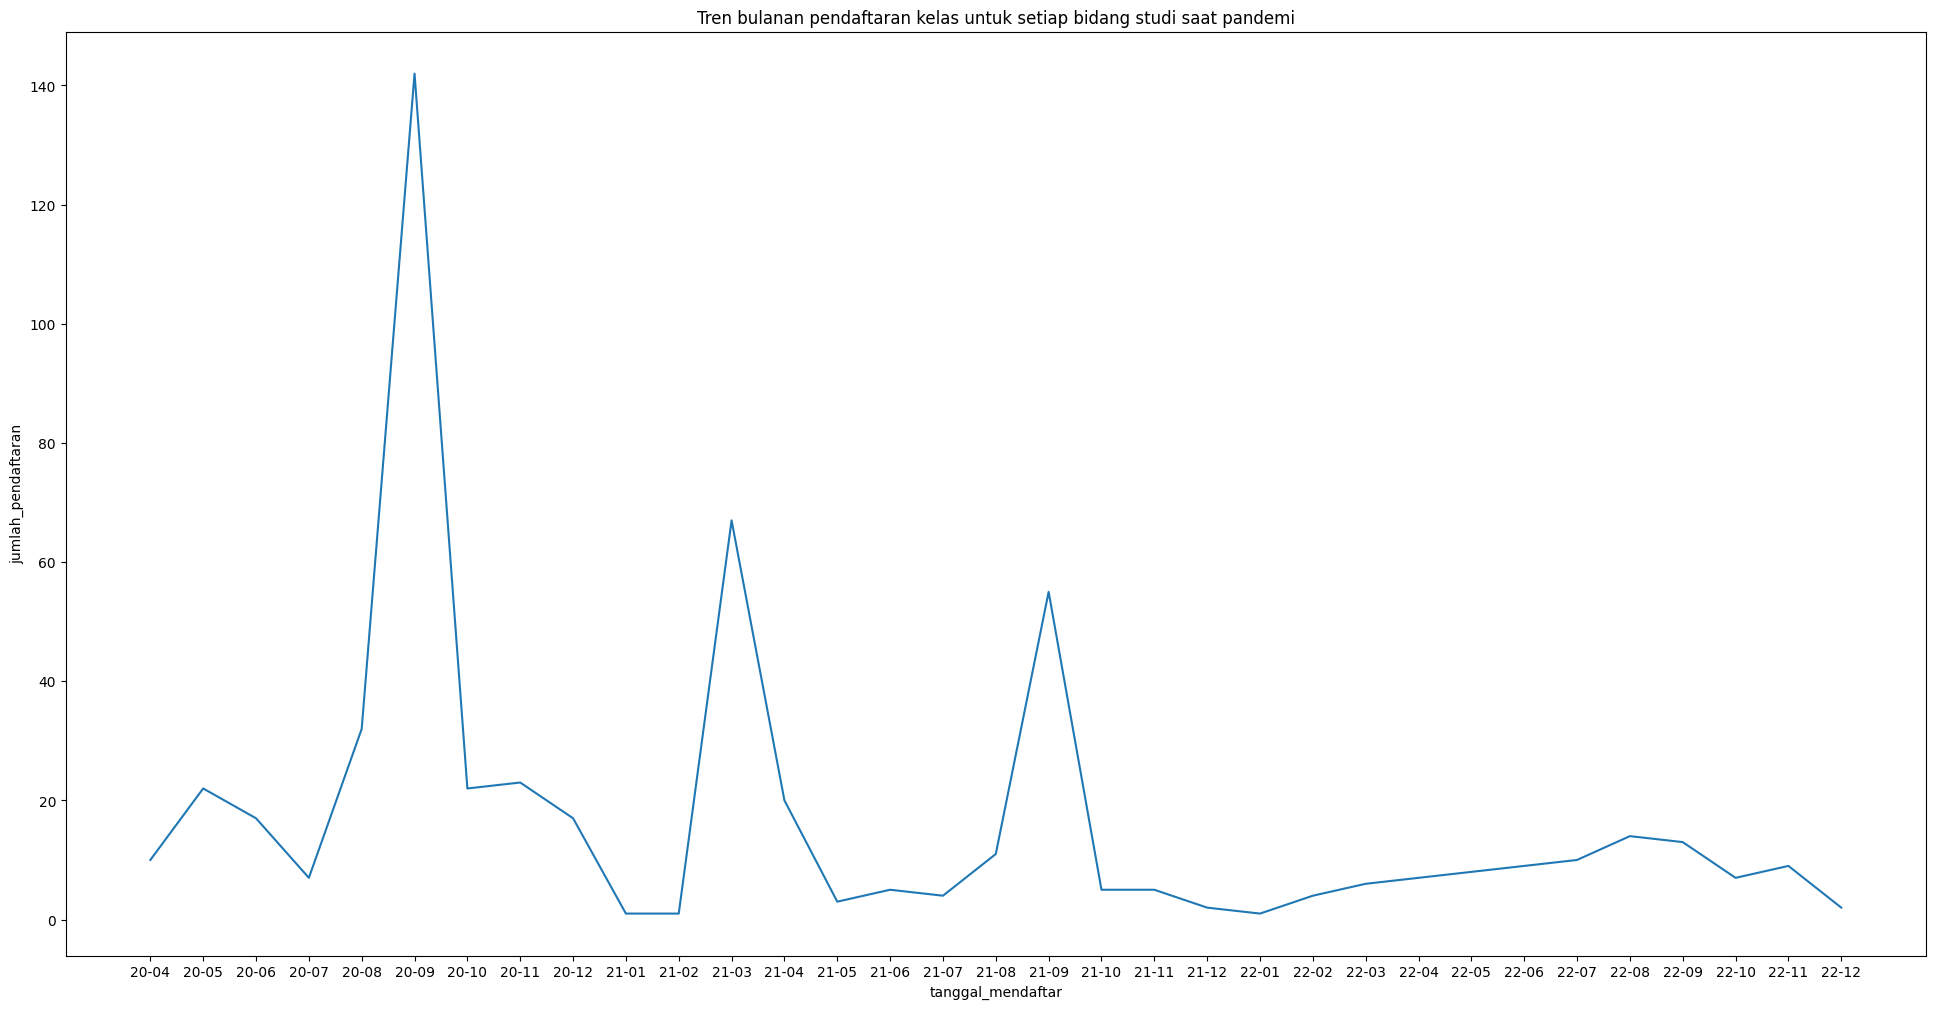

In [73]:
# create a trend lineplot1
plt.figure(figsize=(24, 12))
sns.lineplot(data=tren_tertinggi_1, x='tanggal_mendaftar', y='jumlah_pendaftaran')
plt.title('Tren bulanan pendaftaran kelas untuk setiap bidang studi saat pandemi')

after pandemic

In [74]:
# Monthly trends in class enrollment for each field of study after the pandemic
tren2 = periode_akhir.groupby(pd.Grouper(key='tanggal_mendaftar', freq='m'))['bidang_studi'].value_counts()
tren2

tanggal_mendaftar  bidang_studi                   
2023-01-31         asesmen & reporting                2
                   bisnis manajemen                   1
                   komunikasi bisnis                  1
                   soft skills                        1
2023-02-28         desain grafis percetakan           1
                                                     ..
2023-10-31         pemasaran                          1
                   pendidikan agama                   1
                   perencanaan bisnis                 1
                   simulasi dan komunikasi digital    1
                   soft skills                        1
Name: count, Length: 277, dtype: int64

In [75]:
# fields of study that have the highest interest every month during the pandemic
tren_tertinggi_2 = tren2.groupby(level=0).head(1).reset_index()
tren_tertinggi_2.columns = ['tanggal_mendaftar', 'bidang_studi', 'jumlah_pendaftaran']
tren_tertinggi_2.head()

,tanggal_mendaftar,bidang_studi,jumlah_pendaftaran
0,2023-01-31,asesmen & reporting,2
1,2023-02-28,desain grafis percetakan,1
2,2023-03-31,teknologi (it),3
3,2023-04-30,aplikasi perkantoran,2
4,2023-05-31,administrasi,7


In [76]:
# make register_date be the month of highest_trend_2
tren_tertinggi_2['tanggal_mendaftar'] = pd.to_datetime(tren_tertinggi_2['tanggal_mendaftar']).dt.strftime('%Y-%m')
tren_tertinggi_2

,tanggal_mendaftar,bidang_studi,jumlah_pendaftaran
0,2023-01,asesmen & reporting,2
1,2023-02,desain grafis percetakan,1
2,2023-03,teknologi (it),3
3,2023-04,aplikasi perkantoran,2
4,2023-05,administrasi,7
5,2023-06,administrasi,4
6,2023-07,administrasi,7
7,2023-08,administrasi,11
8,2023-09,administrasi,6
9,2023-10,pendidikan & pelatihan,4


Text(0.5, 1.0, 'Tren bulanan pendaftaran kelas untuk setiap bidang studi saat pandemi')

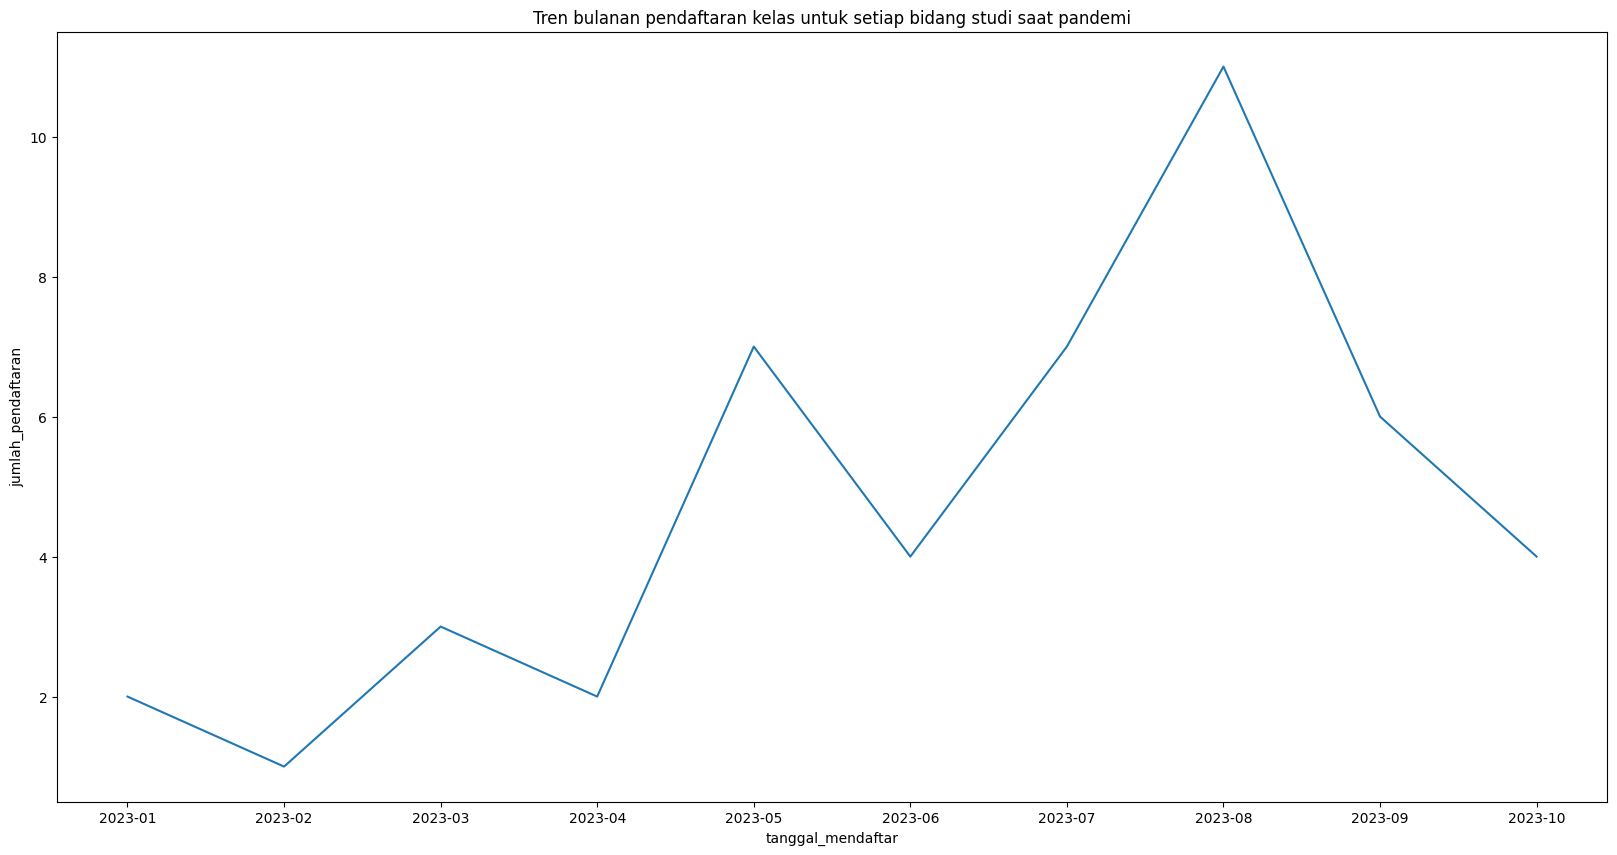

In [77]:
# make lineplot tren1
plt.figure(figsize=(20, 10))
sns.lineplot(data=tren_tertinggi_2, x='tanggal_mendaftar', y='jumlah_pendaftaran')
plt.title('Tren bulanan pendaftaran kelas untuk setiap bidang studi saat pandemi')

# Number 3

What percentage of users have more than 1 class of interest

In [78]:
# Counting the number of classes each user is interested in
kelas_per_pengguna = df_project.groupby('id_pengguna')['id_kelas'].nunique()

In [79]:
print(kelas_per_pengguna)

id_pengguna
00027f68f39686d533ebc10c83d9887f    1
0002f872b6673a3df109e1a17ae2a7be    1
0022481b03794aed232be95fbd4cb99e    1
0028252c274cfb8658291a60ccd90646    1
002ad432c1b8bee463327c51efc3b55f    1
                                   ..
ffbd8094a02871b42c0eb8728310a60e    1
ffe2c37404bb8d0cad95f6b22bf6b8db    1
fff6b1913698c47cc04ff5a08a25b498    1
fffb9a82eee7b384e8fb0fca7f028ef0    1
ffffadbc2701949b0024a826a7e5319b    1
Name: id_kelas, Length: 5220, dtype: int64


In [80]:
# Regroup to get the total number of classes per user
total_kelas_per_pengguna = kelas_per_pengguna.reset_index(name='total_kelas')

In [81]:
# users with total classes attended (interested)
print(total_kelas_per_pengguna)

                           id_pengguna  total_kelas
0     00027f68f39686d533ebc10c83d9887f            1
1     0002f872b6673a3df109e1a17ae2a7be            1
2     0022481b03794aed232be95fbd4cb99e            1
3     0028252c274cfb8658291a60ccd90646            1
4     002ad432c1b8bee463327c51efc3b55f            1
...                                ...          ...
5215  ffbd8094a02871b42c0eb8728310a60e            1
5216  ffe2c37404bb8d0cad95f6b22bf6b8db            1
5217  fff6b1913698c47cc04ff5a08a25b498            1
5218  fffb9a82eee7b384e8fb0fca7f028ef0            1
5219  ffffadbc2701949b0024a826a7e5319b            1

[5220 rows x 2 columns]


In [82]:
# Counts the number of users who have more than one class of interest
pengguna_lebih_dari_satu_kelas = kelas_per_pengguna[kelas_per_pengguna > 1].count()
pengguna_lebih_dari_satu_kelas

22

In [83]:
# Count total users
total_pengguna = df_project['id_pengguna'].nunique()
total_pengguna

5220

In [84]:
# Calculates the percentage of users who have more than one class of interest
persentase_pengguna_lebih_dari_satu_kelas = (pengguna_lebih_dari_satu_kelas / total_pengguna) * 100

In [85]:
print(persentase_pengguna_lebih_dari_satu_kelas)

0.42145593869731796


A large percentage of users who have more than 1 class of interest is 0.42%

# Number 4

The list of users who have the potential to have high voucher redemptions can be seen from the number of classes attended and the last time the user accessed the class

preparation

In [86]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5297 entries, 0 to 5429
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_pendaftaran          5297 non-null   int64         
 1   id_pengguna             5297 non-null   object        
 2   nama_pengguna           5297 non-null   object        
 3   tanggal_lahir           5297 non-null   datetime64[ns]
 4   jenis_kelamin           5297 non-null   object        
 5   id_kelas                5297 non-null   object        
 6   nama_kelas              5297 non-null   object        
 7   bidang_studi            5297 non-null   object        
 8   tanggal_mendaftar       5297 non-null   datetime64[ns]
 9   tanggal_terakhir_akses  5297 non-null   datetime64[ns]
 10  tanggal_menyelesaikan   4796 non-null   datetime64[ns]
 11  aktivitas_selesai       5297 non-null   int64         
 12  total_aktivitas         5297 non-null   int64        

In [87]:
# list of users and number of classes attended
df_4 = df_project.groupby('id_pengguna').agg({'id_kelas': 'nunique'}).sort_values(by='id_kelas', ascending=False)
df_4.columns = ['jumlah_kelas']
df_4

,jumlah_kelas
id_pengguna,
20b1c674d2dfa2ed39aa81011934e786,3
0a96f9651a774192903ea67da52d3d8d,2
c871c648688ecc1100b778a0ea0c2207,2
c31fb00931396ba88f530b11ae8981c3,2
ed1a7a57311465273a88c35d21a8b6be,2
...,...
55a2cbdbd770035c16ed15166db7f2ea,1
5586e028ac9f5586b3d266012301a892,1
5571676813ada7a849b19f5eccfb878d,1


In [88]:
# the difference between the current date and the last access time
df_4['waktu_terakhir_akses'] = (pd.to_datetime('today') - df_project.groupby('id_pengguna')['tanggal_terakhir_akses'].max()).dt.days # Access the days using .dt.days accessor
df_4.reset_index(inplace=True)
df_4

,id_pengguna,jumlah_kelas,waktu_terakhir_akses
0,20b1c674d2dfa2ed39aa81011934e786,3,584
1,0a96f9651a774192903ea67da52d3d8d,2,1348
2,c871c648688ecc1100b778a0ea0c2207,2,1398
3,c31fb00931396ba88f530b11ae8981c3,2,861
4,ed1a7a57311465273a88c35d21a8b6be,2,1228
...,...,...,...
5215,55a2cbdbd770035c16ed15166db7f2ea,1,1388
5216,5586e028ac9f5586b3d266012301a892,1,939
5217,5571676813ada7a849b19f5eccfb878d,1,1018
5218,556f0758b229d92265cfbd042d8b5fe8,1,829


In [89]:
# select the number of classes and last access time for the clustering process
X = df_4.iloc[:, 1:]
X

,jumlah_kelas,waktu_terakhir_akses
0,3,584
1,2,1348
2,2,1398
3,2,861
4,2,1228
...,...,...
5215,1,1388
5216,1,939
5217,1,1018
5218,1,829


In [90]:
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [91]:
# encoding pada id_pengguna
encoder = OneHotEncoder()
encoder.fit(X.select_dtypes(include='object'))
x_onehot = pd.DataFrame(encoder.transform(X.select_dtypes(include='object')).toarray(), columns=encoder.get_feature_names_out())

# gabungkan x_onehot dan x.select_dtypes(include='object')
x_preprocessed = pd.concat([X.select_dtypes(exclude='object'), x_onehot], axis=1)

In [92]:
x_preprocessed.head()

,jumlah_kelas,waktu_terakhir_akses
0,3,584
1,2,1348
2,2,1398
3,2,861
4,2,1228


In [93]:
x_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   jumlah_kelas          5220 non-null   int64
 1   waktu_terakhir_akses  5220 non-null   int64
dtypes: int64(2)
memory usage: 81.7 KB


Perform scaling so that columns with different value ranges do not dominate the clustering results.

In [94]:
# standardization using a scaler (data scaling tool)
scaler = StandardScaler()

# adjust (fit) the scaler and apply transformations to the same data
scaler.fit(x_preprocessed)
x_scaled = pd.DataFrame(scaler.transform(x_preprocessed),columns=x_preprocessed.columns)

x_scaled.head()

,jumlah_kelas,waktu_terakhir_akses
0,28.894783,-1.058972
1,14.415493,0.906889
2,14.415493,1.035545
3,14.415493,-0.346219
4,14.415493,0.598115


# Elbow Method

In [95]:
# import model
from sklearn.cluster import KMeans

distortion = []

#looping for tiap nomor klaster
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_preprocessed)
    distortion.append(kmeans.inertia_)

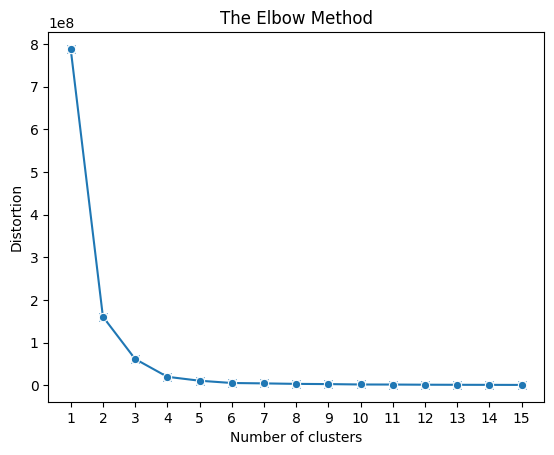

In [96]:
# Make plot
sns.lineplot(x=list(range(1,16)), y=distortion, marker='o')
sns.scatterplot(x=list(range(1,16)), y=distortion, marker='x')
plt.xticks(list(range(1,16)))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

The optimal point for the number of clusters is determined based on the elbow which is described as a very sharp downward change. The first to third distortions (inertia) experienced a sharp decrease but after the 3rd cluster, the decrease in distortion (inertia) tended to level off. Therefore, choosing 3 clusters that group the clusters together is quite good.

In [97]:
# Calculate Silhouette Score
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(x_scaled)
labels = kmeans.labels_

silhouette_avg = silhouette_score(x_scaled, labels)
print(f"The average silhouette_score is : {silhouette_avg}")

The average silhouette_score is : 0.6883170071654229


The Silhouette Score result of 0.688 shows that the clustering results are of quite good quality.

Remodeling data from optimal clusters

In [98]:
# modeling
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

In [99]:
y_kmeans

array([2, 2, 2, ..., 1, 0, 1], dtype=int32)

Visualization Clustering

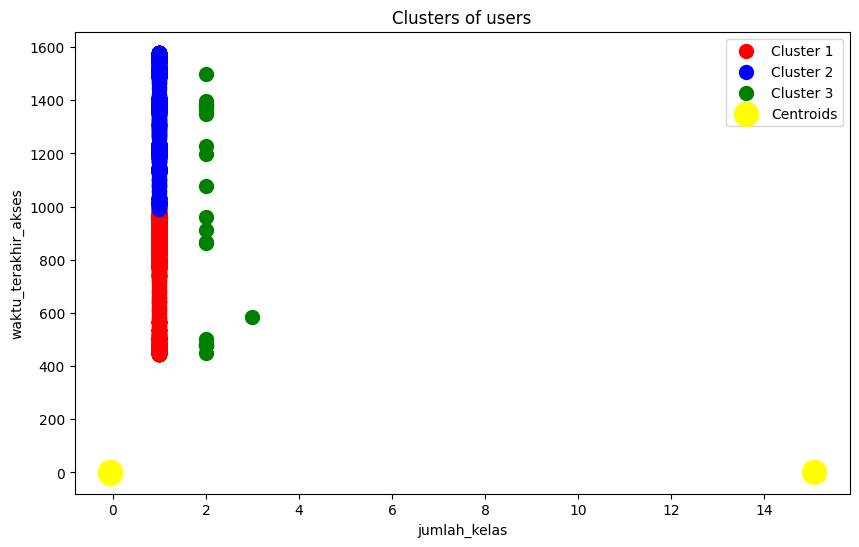

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of users')
plt.xlabel('jumlah_kelas')
plt.ylabel('waktu_terakhir_akses')
plt.legend()
plt.show()

A large number of classes will have more opportunities to redeem vouchers, so choose a list of users in cluster 3.

In [101]:
# Menambah y_kmeans ke df_4
df_4['cluster'] = y_kmeans
df_4

,id_pengguna,jumlah_kelas,waktu_terakhir_akses,cluster
0,20b1c674d2dfa2ed39aa81011934e786,3,584,2
1,0a96f9651a774192903ea67da52d3d8d,2,1348,2
2,c871c648688ecc1100b778a0ea0c2207,2,1398,2
3,c31fb00931396ba88f530b11ae8981c3,2,861,2
4,ed1a7a57311465273a88c35d21a8b6be,2,1228,2
...,...,...,...,...
5215,55a2cbdbd770035c16ed15166db7f2ea,1,1388,1
5216,5586e028ac9f5586b3d266012301a892,1,939,0
5217,5571676813ada7a849b19f5eccfb878d,1,1018,1
5218,556f0758b229d92265cfbd042d8b5fe8,1,829,0


In [102]:
# change cluster 0 to 1, 1 to 2, 2 to 3
df_4['cluster'] = df_4['cluster'].replace({0: 1, 1: 2, 2:3})
df_4

,id_pengguna,jumlah_kelas,waktu_terakhir_akses,cluster
0,20b1c674d2dfa2ed39aa81011934e786,3,584,3
1,0a96f9651a774192903ea67da52d3d8d,2,1348,3
2,c871c648688ecc1100b778a0ea0c2207,2,1398,3
3,c31fb00931396ba88f530b11ae8981c3,2,861,3
4,ed1a7a57311465273a88c35d21a8b6be,2,1228,3
...,...,...,...,...
5215,55a2cbdbd770035c16ed15166db7f2ea,1,1388,2
5216,5586e028ac9f5586b3d266012301a892,1,939,1
5217,5571676813ada7a849b19f5eccfb878d,1,1018,2
5218,556f0758b229d92265cfbd042d8b5fe8,1,829,1


In [103]:
# Data from the third cluster has the potential to have high voucher redemptions
df_4[df_4['cluster'] == 3]

,id_pengguna,jumlah_kelas,waktu_terakhir_akses,cluster
0,20b1c674d2dfa2ed39aa81011934e786,3,584,3
1,0a96f9651a774192903ea67da52d3d8d,2,1348,3
2,c871c648688ecc1100b778a0ea0c2207,2,1398,3
3,c31fb00931396ba88f530b11ae8981c3,2,861,3
4,ed1a7a57311465273a88c35d21a8b6be,2,1228,3
5,7387060879ec847d20e05acf8d760004,2,1382,3
6,b3d0a972bae334f6d46f00185bc57cbc,2,962,3
7,2b5854fbb80cac1b6a639e11f65bf7bb,2,1076,3
8,1a29ec6cc50281ae9f2756bc47e446ef,2,480,3
9,a74cf9f40bbb93810c3972e1ade0d63d,2,1499,3
